# Test Code of Result Analysis

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## Make Reference Path

In [90]:
def make_path():
    """
    Function to generate reference paths
    Returns:
        (path_A, path_B, path_C)
    """
    paths = []
    # 生成するカーブの角度パターン
    theta_list = [np.pi/4, np.pi/2, 3*np.pi/4]
    l_segment = 3.0  # 直線区間の長さパラメータ

    for theta in theta_list:
        # 1. 直進 (0 -> 1m)
        x1 = np.linspace(0, 1, 100)
        y1 = np.zeros_like(x1)
        
        # 2. 斜め直線 (角度thetaで長さl)
        # Note: 実際には直線補間だが、ここでは簡易的に生成
        x2 = np.linspace(1.0, 1.0 + l_segment * math.cos(theta), 300)
        y2 = np.linspace(0.0, l_segment * math.sin(theta), 300)
        
        # 3. 終端直進 (さらに3m進む)
        x3 = np.linspace(
            1.0 + l_segment * math.cos(theta), 
            4.0 + l_segment * math.cos(theta), 300)
        y3 = np.ones_like(x3) * l_segment * math.sin(theta)

        # 結合
        xs = np.concatenate([x1, x2, x3])
        ys = np.concatenate([y1, y2, y3])
        
        path = np.c_[xs, ys]
        
        paths.append(path)
        

    # 展開して返す
    return (paths[0], paths[1], paths[2])

PathA, PathB, PathC = make_path()


## Examine ISO path test

In [91]:
df = pd.read_csv("/home/decwest/decwest_workspace/dwpp_test_simulation/data/dwpp/Path C (135 deg)_RPP_20251215_054113.csv")
# df = pd.read_csv("/home/decwest/decwest_workspace/dwpp_test_simulation/data/dwpp/RPP_None_20251215_033611.csv")


t = df["sec"] - df["sec"][0]

In [92]:
df.head()

,sec,nsec,x,y,yaw,v_real,w_real,v_cmd,w_cmd,v_nav,...,velocity_violation,battery_v,battery_i,battery_percent,imu_ax,imu_ay,imu_az,imu_vx,imu_vy,imu_vz
0,1.765745e+09,73468182,0.000000,0.000000e+00,0.000000,0.060227,-0.000006,0.0,0.000000,0.000,...,False,25.200001,-0.000,0.96,0.555455,0.208296,9.868899,0.063783,-0.060587,-0.004794
1,1.765745e+09,249105033,0.000000,0.000000e+00,0.000000,0.072873,0.026712,0.5,0.001085,0.175,...,False,25.200001,-0.000,0.96,1.819593,0.143652,9.062053,0.007324,-0.049668,0.003595
2,1.765745e+09,278938256,0.000000,0.000000e+00,0.000000,0.172250,0.000000,0.5,0.000049,0.275,...,False,25.200001,-0.303,0.96,2.437297,0.002394,8.303091,-0.007989,-0.045274,0.008788
3,1.765745e+09,543783766,0.000000,0.000000e+00,0.000000,0.198750,0.000006,0.5,0.000584,0.275,...,False,25.200001,-0.303,0.96,1.910573,-0.323217,8.561665,0.005326,0.131294,0.009587
4,1.765745e+09,619396510,0.000795,-2.655134e-07,-0.000534,0.371000,0.053430,0.5,-0.001103,0.400,...,False,25.200001,-0.920,0.96,0.478840,0.471658,10.680534,0.031958,-0.092145,-0.014248


## Examine Record Frequency

In [93]:
sec = df["sec"].values
diff = sec[1:] - sec[:-1]
print(f"Mean dt: {np.mean(diff):.4f} s, Std dt: {np.std(diff):.4f} s")
# 最大間隔と最小間隔
print(f"Max dt: {np.max(diff):.4f} s, Min dt: {np.min(diff):.4f} s")


Mean dt: 0.1299 s, Std dt: 0.1319 s
Max dt: 0.6210 s, Min dt: 0.0172 s


## Plot Path

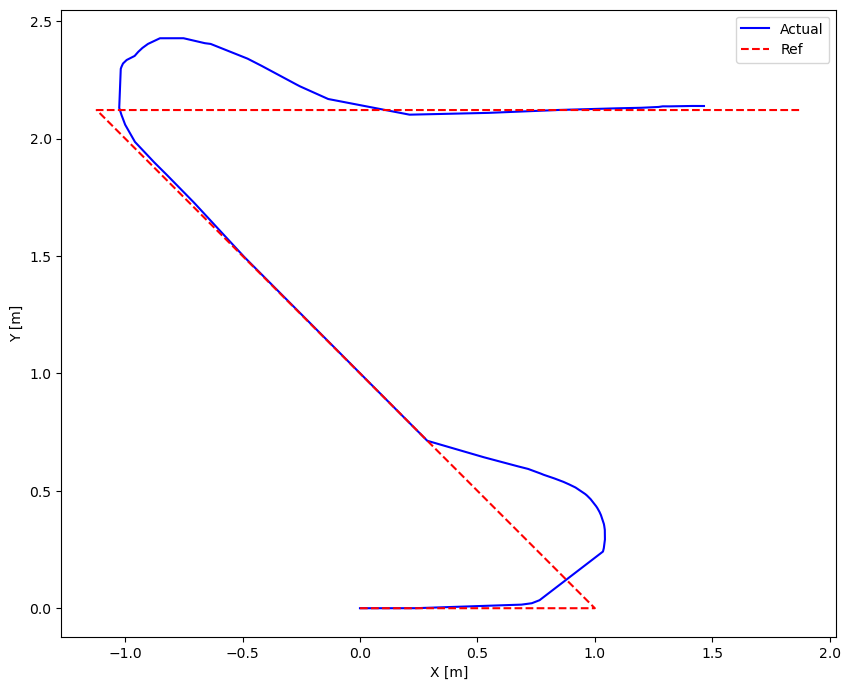

In [94]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(df["x"], df["y"], label="Actual", color="blue")
ax.plot(PathC[:, 0], PathC[:, 1], label="Ref", linestyle="--", color="red")
ax.set_aspect('equal')
ax.set_xlabel("X [m]")
ax.set_ylabel("Y [m]")
ax.legend()
plt.show()

## Plot Velocity

Linear

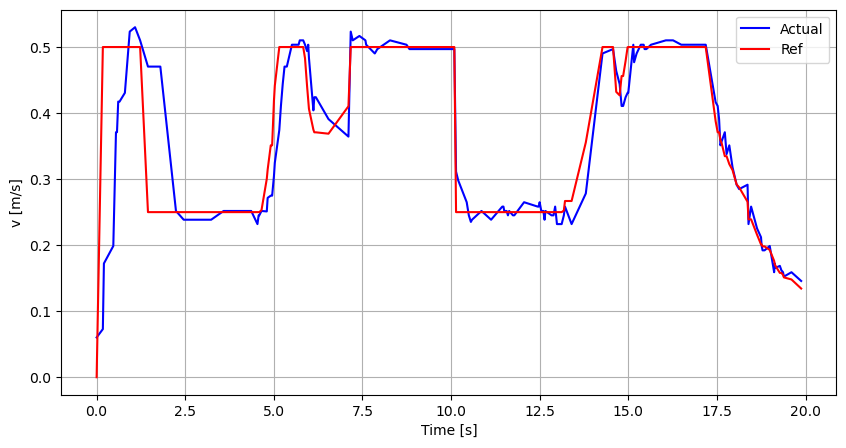

In [95]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, df["v_real"], label="Actual", color="blue")
ax.plot(t, df["v_cmd"], label="Ref", color="red")
ax.set_xlabel("Time [s]")
ax.set_ylabel("v [m/s]")
ax.grid()
ax.legend()
plt.show()

Angular

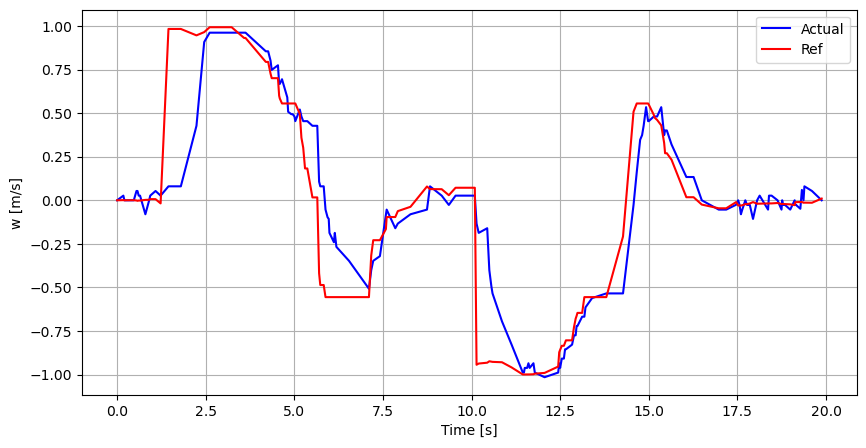

In [96]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, df["w_real"], label="Actual", color="blue")
ax.plot(t, df["w_cmd"], label="Ref", color="red")
ax.set_xlabel("Time [s]")
ax.set_ylabel("w [m/s]")
ax.grid()
ax.legend()
plt.show()

Near the goal, the robot did not finish its navigation for a while, I will fix this

## Plot Position Profile

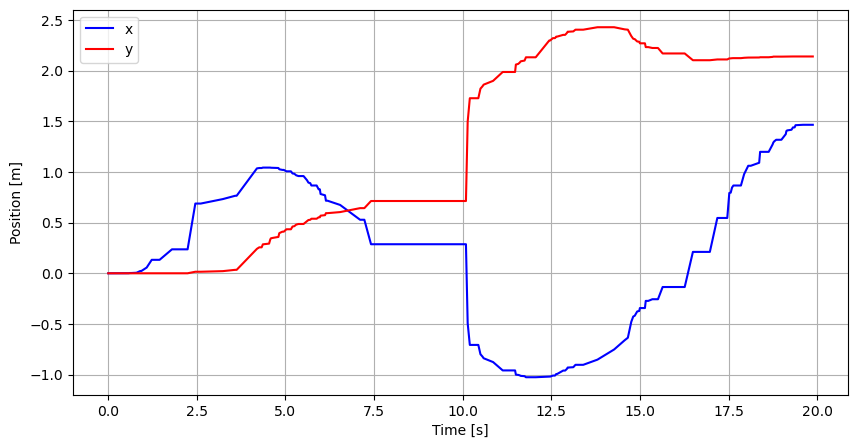

In [97]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, df["x"], label="x", color="blue")
ax.plot(t, df["y"], label="y", color="red")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Position [m]")
ax.grid()
ax.legend()
plt.show()

## Plot current

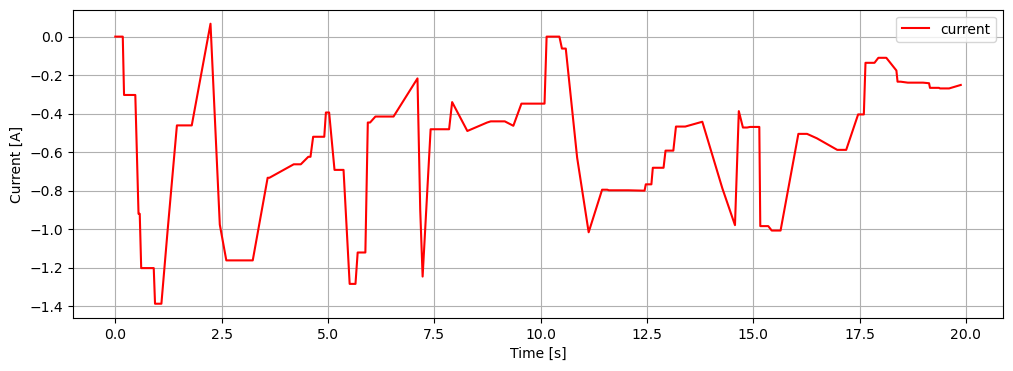

In [98]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, df["battery_i"], label="current", color="red")
# ax.set_aspect('equal')
ax.set_xlabel("Time [s]")
ax.set_ylabel("Current [A]")
ax.grid()
ax.legend()
plt.show()

Maybe there is an offset...? about -0.3 [A]

## Calc RMSE

In [99]:
from scipy.spatial.distance import cdist

def calc_rmse(robot_path: np.ndarray, path: np.ndarray) -> float:

    # Compute the distances between each point on the robot trajectory and each point on the path at once (using scipy's cdist)
    # distance_matrix has shape = (number of points in the robot trajectory, number of points in the path)
    distance_matrix = cdist(robot_path, path, metric='euclidean')

    # Take the minimum along the row direction to extract the minimum distance for each robot point
    min_distances = np.min(distance_matrix, axis=1)

    # Compute RMSE
    rmse = np.sqrt(np.mean(min_distances**2))
    
    return rmse


In [100]:
robot_x = df["x"].to_numpy()
robot_y = df["y"].to_numpy()
robot_path = np.c_[robot_x, robot_y]

rmse = calc_rmse(robot_path, PathC)
print(f"RMSE: {rmse:.4f} m")

RMSE: 0.1628 m


## Plot PathB

In [101]:
from matplotlib import pyplot as plt
# 経路の描画
plt.figure(figsize=(8, 8))
plt.plot(path_B[:, 0], path_B[:, 1], 'k--', label="Reference", linewidth=3)
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'path_B' is not defined

<Figure size 800x800 with 0 Axes>